# Implementing KNN/SVM for 7 classes

## Importing Modules necessary

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
from sklearn import svm,  neighbors
from sklearn.model_selection import StratifiedShuffleSplit ,GridSearchCV , train_test_split
from pylab import *
import matplotlib.ticker as ticker
import umap
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Preprocessing of Data, from nanotaglistsortednorm.csv

In [4]:
df1 = pd.read_csv("nanotaglistsortednorm.csv")
dictLabel = {'b000':0,'b001':1,'b010':2,'b100':3,'b101':4,'b110':5,'b111':6}
#df1 = df1.query('code == "b000" or code == "b001" or code =="b100" or code == "b110" or code == "b111" or code == "b010" or code == "b101"')
labels = df1['code']

## Checking the number of datapoints in each class

In [5]:
new_labels = [dictLabel[l] for l in labels]
class_count = {0: 0, 1: 0, 2: 0, 3:0 , 4:0 , 5:0, 6:0}
for l in new_labels:
    class_count[l] += 1

print(class_count)

{0: 17, 1: 21, 2: 14, 3: 14, 4: 10, 5: 7, 6: 16}


## Splitting it into test and train Data

In [6]:
X=df1[['F','Br','I']]
y=new_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## SVM Model Fit


In [7]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

svclassifier = SVC(kernel='rbf',C = 10.0, gamma = 1.0)
svclassifier.fit(X, y) 
y_pred = svclassifier.predict(X)  

The best parameters are {'C': 10000.0, 'gamma': 0.01} with a score of 0.85


## K-NN Model fit for 2 to 4 neighbours

In [8]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=4)
neigh.fit(X, y)
y_pred = neigh.predict(X)
acc_test = 100*np.sum(y_pred == y)/len(y)
#print(confusion_matrix(y, y_pred))  
#print(classification_report(y, y_pred))

## Defining plotting functions 

In [9]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Plotting of data

<class 'pandas.core.frame.DataFrame'>


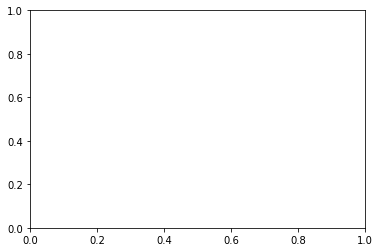

In [10]:
# data to plot
print(type(X))
X = np.array(X)
X0 = X[:, 0]
n_groups = 7
manual = (17,21,14,14,10,7,16)
SVM = (7,21,14,13,10,3,15)
kmeans_2 = (17,19,10,14,10,5,4)
kmeans_3 = (14,20,12,13,8,5,14) 
kmeans_4 = (14,20,12,13,8,3,14)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


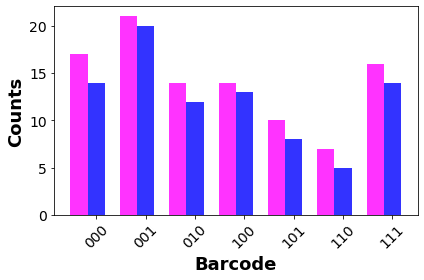

In [11]:
rects1 = plt.bar(index, manual, bar_width,
alpha=opacity,
color='magenta',
label='Manual')

rects2 = plt.bar(index + bar_width, kmeans_3, bar_width,
alpha=opacity,
color='blue',
label='kmeans_4')

plt.xlabel('Barcode',fontweight = 'bold',fontsize = 18)
plt.ylabel('Counts',fontweight = 'bold',fontsize = 18)

plt.xticks(index + bar_width, ('000', '001', '010', '100','101','110','111'))

fontsize = 14
ax = gca()
plt.yticks(np.arange(5), ('0', '5','10','15','20' ))
ax.set_xticklabels(['000','001', '010', '100','101','110','111'], minor=False, rotation=45)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    #tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    #tick.label1.set_fontweight('bold')
for axis in [ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(5))
plt.tight_layout()
plt.show()

## Scatterplot 3D of data

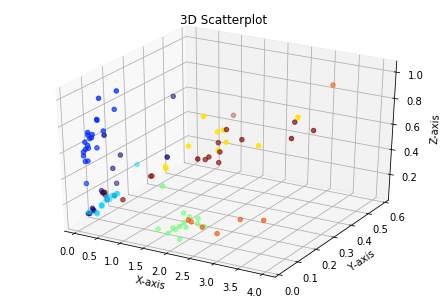

In [12]:
X=df1[['F','Br','I']]
X_F= X[['F']]
X_Br= X[['Br']]
X_I =X[['I']]

N = 7 

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig = plt.figure()

ax = Axes3D(fig) 
scat = ax.scatter(X_F,X_Br,X_I,c=y,cmap=cmap,norm=norm)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title("3D Scatterplot")


plt.show()

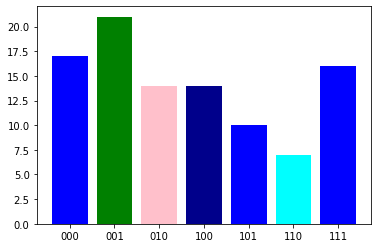

In [13]:
manual = (17,21,14,14,10,7,16) #data
bars = ('000','001', '010', '100','101','110','111')
y_pos = np.arange(len(bars))
plt.bar(y_pos, manual, color=['blue','green','pink','darkblue', 'blue', 'cyan'])
plt.xticks(y_pos, bars)
plt.show()
